## Importing and cleaning information for the analysis

In [ ]:
# Importing Libraries
import ast # To convert the skils to a list
import pandas as pd 
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data (Job postings)
df = pd.read_csv(r"C:\Users\WIN10\Desktop\Job_Analysis_Canada_2025\Job_CSV\jobs_postings.csv")


# Data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Create the column month (data will be analyzed monthly)

df['job_posted_month'] = df['job_posted_date'].dt.strftime('%b')

# Filter by the year and sorting by month
df_2025 = df[df['job_posted_date'].dt.year == 2025].copy()
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df_2025['job_posted_month'] = pd.Categorical(
    df_2025['job_posted_month'],
    categories=month_order,
    ordered=True
)

## How are in-demand skills trending for Data Analysts and Scientists in Canada

### Metholodgy
1. Aggregate skill counts monthly
2. Analyze based on the skill count to compare the frequency of each skills
3. Plot the monthly skill demand

### Filtering the data for Canadian postings and exploding the column for skills

In [2]:
# Get the months to analyze (first semester 2025)
month_analyze = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

# Get the job postings for Data Analyst and explode the data based on the skills
df_da_ca = (df_2025[(df_2025['job_country'] == "Canada") 
                    & (df_2025['job_title_short'] == "Data Analyst") 
                    & (df_2025['job_posted_month'].isin(month_analyze))])
df_da_ex = df_da_ca.explode('job_skills')

# Get the job postings for Data Scientist and explode the data based on the skills
df_ds_ca = (df_2025[(df_2025['job_country'] == "Canada") 
                    & (df_2025['job_title_short'] == "Data Scientist")
                    & (df_2025['job_posted_month'].isin(month_analyze))])
df_ds_ex = df_ds_ca.explode('job_skills')

### Getting data for the most in-demand skills over the months

In [ ]:
# Pivot the information for Data Analysts
df_da_pivot = (df_da_ex.pivot_table(index='job_posted_month', 
                                    columns='job_skills', 
                                    aggfunc='size', 
                                    fill_value=0))

# Identify top skills based on total frequency
df_da_pivot.loc['Total'] = df_da_pivot.sum()

# Sort columns and keep top 5 skills
sort_columns = df_da_pivot.loc['Total'].sort_values(ascending=False).index
df_da_pivot = df_da_pivot[sort_columns]
df_da_pivot = df_da_pivot.drop('Total')
df_da_pivot = df_da_pivot.iloc[:, :5]


# Pivot the information for Data Scientists
df_ds_pivot = (df_ds_ex.pivot_table(index='job_posted_month', 
                                    columns='job_skills', 
                                    aggfunc='size', 
                                    fill_value=0))

# Identify top skills based on total frequency
df_ds_pivot.loc['Total'] = df_ds_pivot.sum()
sort_columns = df_ds_pivot.loc['Total'].sort_values(ascending=False).index

# Sort columns and keep top 5 skills
df_ds_pivot = df_ds_pivot[sort_columns]
df_ds_pivot = df_ds_pivot.drop('Total')
df_ds_pivot = df_ds_pivot.iloc[:, :5]

### Plotting the most in-demand skills trending

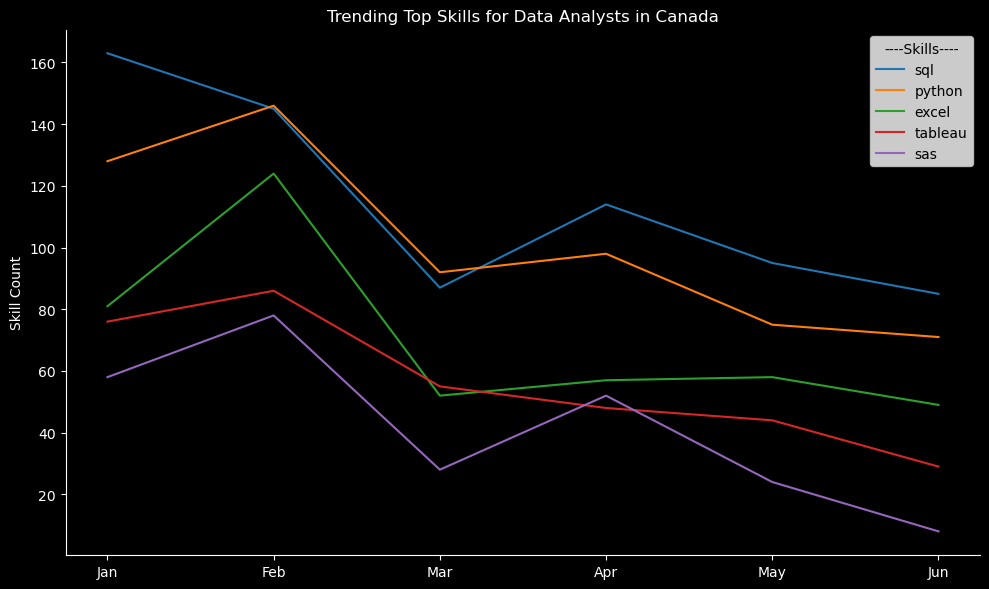

In [4]:
# Creating the plot
fig, ax = plt.subplots(figsize=(10,6))


# Plotting the information
df_da_pivot.plot(kind='line', ax=ax)
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.set_ylabel('Skill Count', color='white')
ax.tick_params(color='white', labelcolor='white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.legend().set_title('----Skills----')
ax.get_legend().get_title().set_color('black')
ax.set_title('Trending Top Skills for Data Analysts in Canada', color='white')
ax.set_xlabel('')


    
fig.tight_layout()
plt.show()


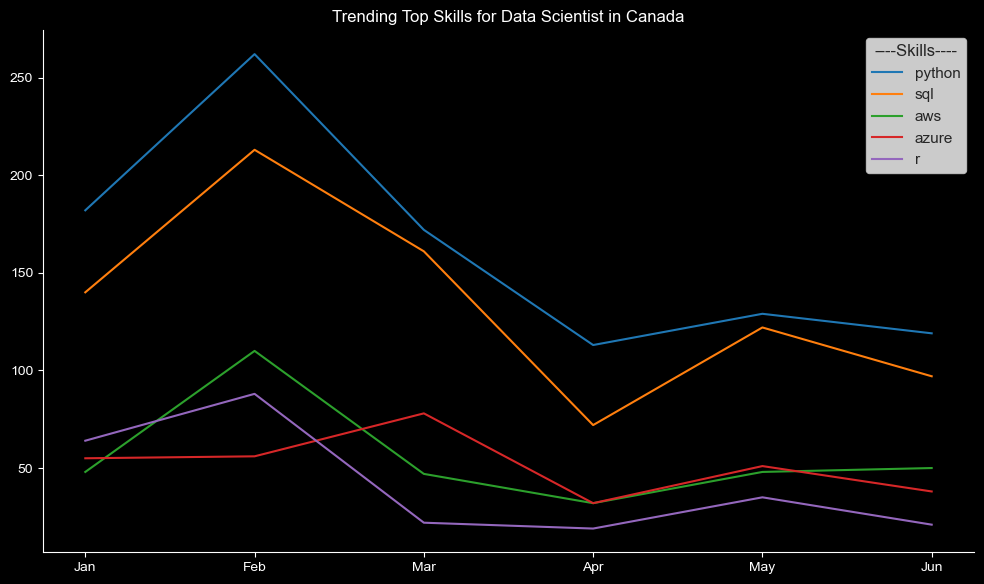

In [5]:
# Creaing the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting
sns.lineplot(data=df_ds_pivot, dashes=False)
sns.set_theme(style='ticks')
sns.despine()
ax.set_facecolor('black')
ax.tick_params(color='white', labelcolor='white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.get_legend().get_title().set_color('black')
ax.legend().set_title('----Skills----')
ax.set_title('Trending Top Skills for Data Scientist in Canada', color='white')
ax.set_xlabel('')


fig.patch.set_facecolor('black')
fig.tight_layout()
plt.show()